## Шаг 1. Откройте файл с данными и изучите общую информацию

Путь к файлу: /datasets/games.csv

## Шаг 2. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
           o	Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
           o	Опишите причины, которые могли привести к пропускам;
           o	Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

## Шаг 3. Проведите исследовательский анализ данных
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


## Шаг 4. Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## Шаг 5. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

## Шаг 6. Напишите общий вывод
__Оформление:__ Выполните задание в Jupyter Notebook. Заполните программный код в ячейках типа code, текстовые пояснения — в ячейках типа markdown. Примените форматирование и заголовки.

# Откроем файл с данными и изучим информацию

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import stats as st

In [2]:
# Откроем файл с данными и сохраним его в переменной games 
data = pd.read_csv('/datasets/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#посмотрим общие сведения о таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
#Проверим таблицу на налачие пропусков
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Файл открыли и изучили. Данный файл содержит 16715 строк и 11 колонок. Таблица содержит 6 столбцов c вещественными числами (тип float), 5 столбцов с типом object. Так же при изучении таблицы можно заметить в некоторых столбцах несоответствие типа данных, например в столбце Year_of_Release - должны быть данные представляющие целые числа. Так же в таблице допущено множество пропусков, такие пропуски могли быть вызваны человеческим фактором, могли неуказать какие-то конкретные параметры, возможно из-за его отсутствия (предположим, что столбец "Rating" имеет пропуски, так как возростную категорию  могли не указать, так как на момент выхода игры отсутствовало обязательство по присвоению возростного ценза), а так же могла произойти техническая ошибка, которая могла возникнуть в результате переноса данных, или же при копировании данных, сбой может произойти даже во время записи данных. 

# Шаг 2. Подготовьте данные

__Замените названия столбцов (приведите к нижнему регистру)__

In [5]:
data.columns = data.columns.str.lower()

# Посмотрим что получилось
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Название столбцов приведены к нижнему регистру

__Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему__

In [6]:
data[['year_of_release', 'critic_score']] = data[['year_of_release', 'critic_score']].astype('Int64')

# Посмотрим что получилось
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


Преобразовали к целым числам (int) столбец с датой выхода,  так как она не может иметь дробное значение, и так же оценка критиков, так как она так же имела целые числа, а после запятой были 0.

In [8]:
# Уникальные значения оценок пользователей
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

В столбце оценка пользователей встречается значение TBD — сокращение от To Be Determined. Служит для отметки неясностей, т.е. пользователь еще не определился с оценкой, а остальные значения имеют десятичную оценку, считаю что данный столбец необходимо преобразовать в float64, псоле обработки пропусков.

__Обработайте пропуски при необходимости__

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

In [10]:
data['user_score'].sort_values().unique()

array([0. , 0.2, 0.3, 0.5, 0.6, 0.7, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5,
       1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8,
       2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1,
       4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4,
       5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7,
       6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ,
       8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1, 9.2, 9.3,
       9.4, 9.5, 9.6, 9.7, nan])

Данные в столбце Оценка пользователей переведена в float64, а значение tbd заменена на nan, так как неясно, какая оценка по итогу будет, а заменить ее на среднее или медианное значение будет не корректно, и указывать 0, так как пользователь мог в действительности выставить такую оценку.

In [11]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

__Обработаем пропуски в столбце "name"__

Так как в данном столбце всего 2 пропуска, считаю что их можно удалить, так как их очень мало, и на качество анализа это не повлияет

In [12]:
data=data.dropna(subset=['name'])

In [13]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

__Обработаем пропуски в столбце "year_of_release"__

Так как реальный год выпуска игры нам не известен, и 269 значений искать в интернет массивах оооочень трудоемко, а так же заполнять эти данные средним или медианным значением не правильно, считаю, что их можно удалить, и по итогу будет удалено менее 10% от изначального объема данных.

In [14]:
data = data.dropna(axis='index', how='any', subset=['year_of_release'])

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

__Обработаем пропуски в столбце "Critic_Score", "rating"__

Ранее уже высказалась, что допущенные пропуски в столбце rating имеется пропуски, так как возростную категорию могли не указать, так как на момент выхода игры отсутствовало обязательство по присвоению возростного ценза. Возможно именно игры которые самые старые преимущественно имеют пропущенные значения  в столбцах с рейтингами и оценками критиков и пользователей, именно по той причине, что ранее этим попропосту не занимались. Проверим.

In [16]:
data.sort_values(['year_of_release']).head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1764,Kaboom!,2600,1980,Misc,1.07,0.07,0.0,0.01,<NA>,NaN,NaN
546,Missile Command,2600,1980,Shooter,2.56,0.17,0.0,0.03,<NA>,NaN,NaN
1968,Defender,2600,1980,Misc,0.99,0.05,0.0,0.01,<NA>,NaN,NaN
6300,Bridge,2600,1980,Misc,0.25,0.02,0.0,0.00,<NA>,NaN,NaN
5360,Freeway,2600,1980,Action,0.32,0.02,0.0,0.00,<NA>,NaN,NaN
262,Asteroids,2600,1980,Shooter,4.00,0.26,0.0,0.05,<NA>,NaN,NaN
4019,Ice Hockey,2600,1980,Sports,0.46,0.03,0.0,0.01,<NA>,NaN,NaN
6875,Checkers,2600,1980,Misc,0.22,0.01,0.0,0.00,<NA>,NaN,NaN
2650,Boxing,2600,1980,Fighting,0.72,0.04,0.0,0.01,<NA>,NaN,NaN
3394,BurgerTime,2600,1981,Puzzle,0.55,0.03,0.0,0.01,<NA>,NaN,NaN


По сути так и есть, ранее выпущенные игры имеет во всех 2-х столбцах пропущенные значения. Так как данные столбцы заполнять медианным или средним значением будет не корректно, и удалить такую большую часть данных мы не можем, да и заполнить их 0 будет не корректно, иначе исказится результат, считаю что данные пропуски необходимо оставить так как есть.

__Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец__

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,NaN,28.31



<br>Обработаем пропуски в стобце rating. Так как этот столбец мы не можем заполнить средним илимедианным значением, поставим заглушку
</div>

In [18]:
data[['rating']] = data[['rating']].fillna(-1)
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,-1,28.31


# Шаг 3. Проведите исследовательский анализ данных

__Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?__

<AxesSubplot:xlabel='year_of_release'>

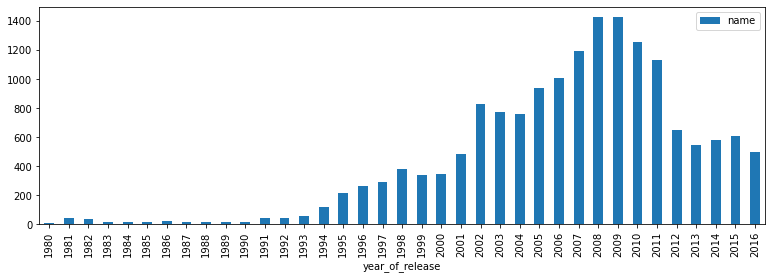

In [19]:
# Для начала создадим сводную таблицу по годам выпуска игр, а далее построим диаграмму, для визуализации
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(13, 4))

Судя по диаграмме можно сделать вывод что данные за все периоды не важны, так как до 1995 года выпускалось очень мало игр (менее 200). Пик количества игр по годам пришелся на 2008-2009, далее идет спад. 

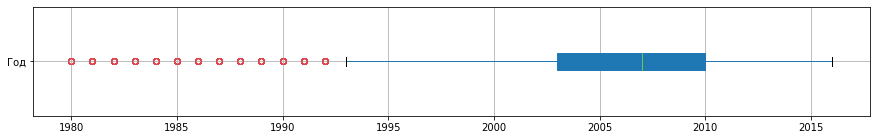

In [20]:
#Построим диаграмму размаха, чтобы увидеть явные выбросы
year_of_release_no_emissions=data.boxplot('year_of_release', vert=False, figsize=(15,2), patch_artist=True, flierprops=dict(markeredgecolor="#e0434b"),
            medianprops=dict(color='#71c451'))
year_of_release_no_emissions.set_yticklabels(['Год'])
plt.show()

In [21]:
#Удалим выбросы
data = data.query('year_of_release >= 1994')

<AxesSubplot:xlabel='year_of_release'>

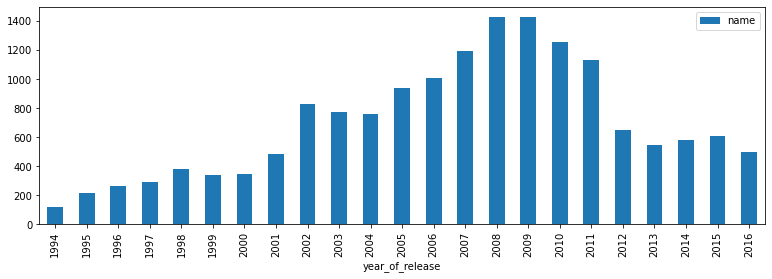

In [22]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot(kind='bar', figsize=(13, 4))

__Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?__

In [23]:
# Для начала создадим сводную таблицу по годам выпуска игр на различных платформах и запишим ее в новую переменную
total_sales_on_platforms = data.pivot_table(index=('platform', 'year_of_release'), values='total_sales', aggfunc='sum').reset_index()
total_sales_on_platforms

,platform,year_of_release,total_sales
0,3DO,1994,0.02
1,3DO,1995,0.08
2,3DS,2011,63.20
3,3DS,2012,51.36
4,3DS,2013,56.57
...,...,...,...
192,XB,2008,0.18
193,XOne,2013,18.96
194,XOne,2014,54.07
195,XOne,2015,60.14


Выберем ТОП-10 платформ с наибольшими суммарными продажами и постройте распределение по годам

In [24]:
platf_top10 = (total_sales_on_platforms
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='total_sales', ascending=False)
                        .head(10)
                        .reset_index(drop=True)
                   )
platf_top10

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.76
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


Из выделенных 10 платформ с наибольшемы продажами особенно выделяются 6, далее сумма продаж значительнро ниже, более чем в два раза. Поэтому ТОП-10, перевоплотим в ТОП-6.

Теперь построим распределение по годам

In [25]:
# Построим отдельную таблицу с платформами, которые вошли в топ-6 по суммарным продажам
platf_top6_2 = data[(data['platform'] == 'PS2') | (data['platform'] == 'X360') | (data['platform'] == 'PS3') | (data['platform'] == 'Wii')| (data['platform'] == 'DS') | (data['platform'] == 'PS')]
platf_top6_2.head(6)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32


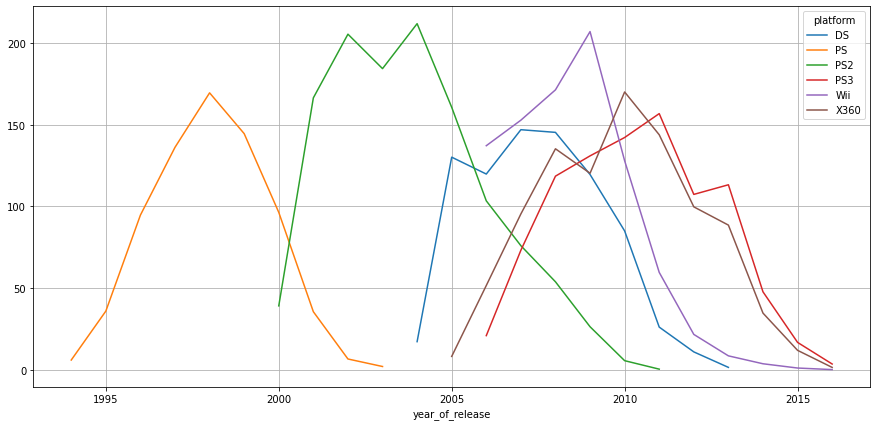

In [26]:
# И уже на основании данных из новой таблицы, в которую вошли топ-6, построим распределение по годам.
pd.pivot_table(platf_top6_2, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(15,7))
plt.grid(True)

Судя по графику можно сделать следующий вывод:
- Платформа "DS" в свои лучшие годы просуществовала - с 2004 по 2013 - 9 лет, лучшие продажи пришлись на 2008 год.
- Платформа "PS" - с 1994 по 2004 - 10 лет, пик в  1998.
- Платформа "PS2" - с 2000 по 2011 - 11 лет, пик 2002 по 2004.
- Платформа "PS3" - с 2006 по настоящее время, но сдала позиции, согласно имеющимся данным, пик в 2011
- Платформа "Wii" - с 2006 прям зашла так сказать с успехом, уже с высокими продажами, по настоящее врнемя, но сдала позиции, согласно имеющимся данным, пик на 2009
- Платформа "X360" - с 2005 по настоящее время, но сдала позиции, согласно имеющимся данным, пик на 2010.

Согласно описанному выше можно сделать вывод, что средний срок существования платформ 10 лет.
Если посмотреть на начало 90-х, то мы можем увидеть, что конкуренции как таковой и не было, платформа PS была единственной с высокими продажами, и так вплоть до 2004 было мало хороших платформ, но с развитием индустрии, и развитием технологий, а так же появлению все новых идей, количество платформ начинает увеличеватся, и не просто на 1 штуку, а появляется очень много конкурентов. PS хорошо справляется с конкуренцией, развивает совю платформу, и выпускает не менее успешные PS2  и PS3. 
На популярность каждой платформы влияли фанаты игр, которые выходили эксклюзивно на определенных платформах, например: для PS3  Uncharted 3: Иллюзии Дрейка вышла в 2011 году, имеет высокий рейтинг. А так же сильно влияло доп.оборудование выпускаемое к каждой платформе эксклюзивно, например для PS3 это PS Move. Соответственно на жизнь каждой платформы влияет несколько факторов, это фанаты игр, развитие технологий и эксклюзивное доп.оборудование, это все приносит больше прибыли.

__Возьмите данные за соответствующий актуальный период для построения прогноза на 2017__

Считаю что актуальный период для такой индустрии будет с 2012 по 2016. Слишком большой интервал так же не имеет смысла брать, технологии меняются, и предпочтения потребителей.

In [27]:
current_period = data.query('2012 <= year_of_release')
current_period.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


__Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ__

In [28]:
current_period_on_platforms = current_period.groupby(['platform']).agg({'total_sales':'sum'})
display(current_period_on_platforms.sort_values(by='total_sales', ascending=False).head(15))

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


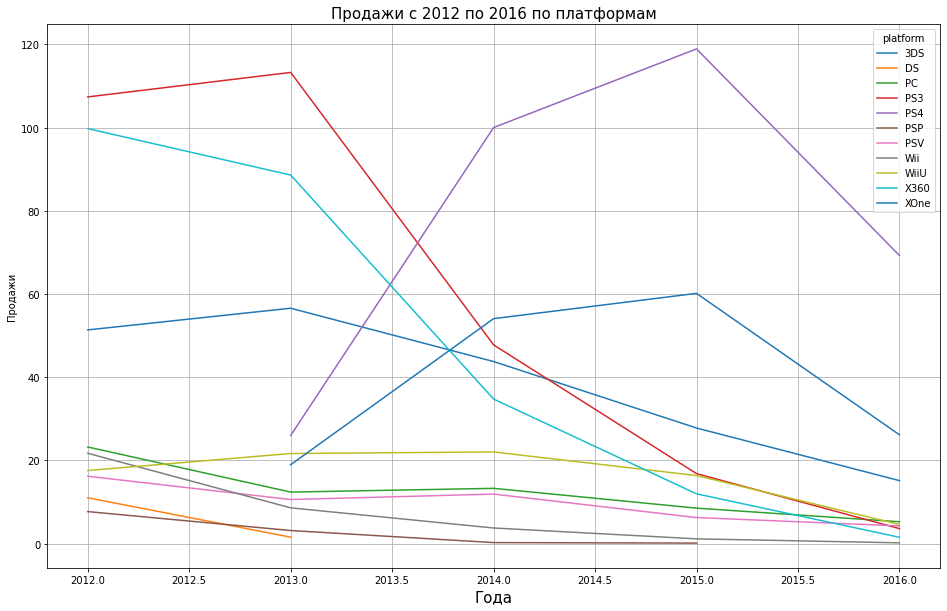

In [29]:
pd.pivot_table(current_period, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(figsize=(16,10))
plt.grid(True)
plt.title('Продажи с 2012 по 2016 по платформам', fontsize=15)
plt.xlabel('Года',fontsize=15)
plt.ylabel('Продажи')
plt.show()

За выбранный период, можно сделать вывод, что лидируют по суммарным продажам PS4- но согласно графику, продажи с 2015г стали падать. Несколько потенциально прибыльных платформ: PS3, X360, PS4, 3DS и XOne. Все они в топе, по суммарным продажам, за актуальный период.

__Выберу наиболее перспективные платформы__

In [30]:
promising_platforms = current_period[(current_period['platform'] == 'PS4') | (current_period['platform'] == 'X360') | (current_period['platform'] == 'PS3') | (current_period['platform'] == '3DS')| (current_period['platform'] == 'XOne')]
promising_platforms.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,-1,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


__Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.__

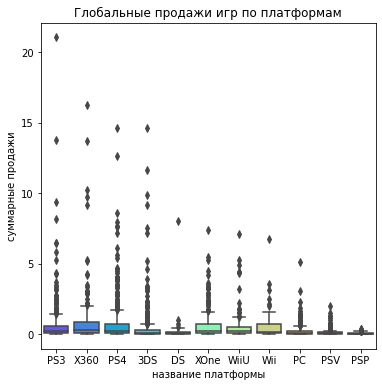

In [31]:
mustache_box = plt.subplots(figsize=(6,6))
plt.title("Глобальные продажи игр по платформам")
plot = sbn.boxplot(x="platform", y="total_sales", data=current_period, palette='rainbow')
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи')
plt.show()


<br>Построим дополнительный график, чтобы рассмотреть поближе и корректно сравнить статисики разных платформ.
</div>

(0.0, 2.0)

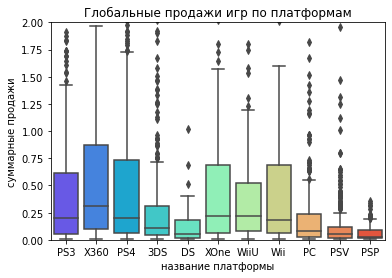

In [32]:
plt.title("Глобальные продажи игр по платформам")
plot = sbn.boxplot(x="platform", y="total_sales", data=current_period, palette='rainbow')
plt.xlabel('название платформы')
plt.ylabel('суммарные продажи')
plt.ylim(0,2)

In [33]:
current_period.pivot_table(index='platform', values='total_sales', aggfunc='sum').nlargest(10, 'total_sales')

,total_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18
Wii,35.37


По данному графику можно сделать выводы, что в период с 2012 по 2016 лидерами продаж являлись, PS4, PS3, X360 далее со средними показателями - XOne, WiiU, 

__Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.__

На примере PS4 - за актуальный период с 2012 по 2016 является часой популярной.

- Влияние оценки критиков на продажи

In [34]:
data_ps = data[data['platform'] == 'PS4']

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

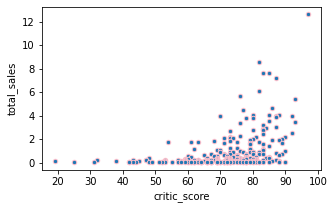

In [35]:
ps4_critic = data_ps[(data_ps['platform'] == 'PS4') & (data_ps['critic_score'] > 0)]
ps4_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='pink', figsize=(5,3))

По диаграмме рассеивания можно сделать вывод, что чем выше оценка критиков, тем выше становятся продажи. Это логично, многие пользователи доверяют отзывам экспертов, и на этом могут основывваться их покупки.

- Влияние оценки пользователей на продажи

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

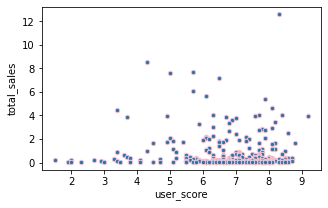

In [36]:
ps4_users = data_ps[(data_ps['platform'] == 'PS4') & (data_ps['user_score'])]
ps4_users.plot(kind='scatter', x='user_score', y='total_sales', ec='pink', figsize=(5,3))

Утверждение, что оценка пользователей влияет на продажи, имеет место быть, но не так как с оценкой критиков. Скорее всего, покупатель не так сильно полагается на личное мнение пользователя, поэтому мы можем увидеть, что при оценки 4,5 были высокие продажи, а приоценки 8 продажи ниже. Здесь думаю покупатель больше полагается на собственные предпочтения в играх, ну или на отзывы компетентных игроков, которые в этой сфере себя и своё виденье уже зарекомендовали.

In [37]:
data_ps_cor = data_ps[['total_sales', 'critic_score', 'user_score']]
data_ps_cor.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


По таблице с корреляцией, так же видно что связи с оценкой пользователей и продажами нет, а связь с оценкой критиков и продажами есть необольшая.

__Соотнесите выводы с продажами игр на других платформах__

Влияние оценки критиков на продажи по наиболее перспективным платформам за актуальный период

In [38]:
#critic = promising_platforms[(promising_platforms['platform'] != 'PS4') & (promising_platforms['critic_score'] > 0)]
#critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(5,3))

Влияние оценки критиков имеется.

Влияние оценки пользователей на продажи по наиболее перспективным платформам за актуальный период

In [39]:
#users = promising_platforms[(promising_platforms['platform'] != 'PS4') & (promising_platforms['user_score'])]
#users.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(5,3))

Влияние оценки пользователей не имеется.

In [40]:
#correlation = pd.DataFrame(promising_platforms[['critic_score','user_score', 'total_sales']])
#correlation.corr()

По таблице с корреляцией, так же видно что связи с оценкой пользователей и продажами нет, а связь с оценкой критиков и продажами есть необольшая. Впринципе от платформы не зависят эти взаимосвязи.


<br>Влияние оценки критиков и пользователей на продажи по наиболее перспективным платформам (PS3, X360).
</div>

__PS3__

- Влияние оценки критиков на продажи

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

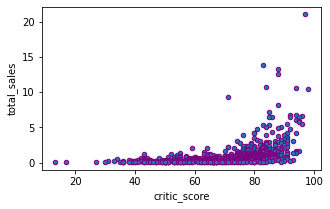

In [41]:
data_ps3 = data[data['platform'] == 'PS3']
ps3_critic = data_ps3[(data_ps3['platform'] == 'PS3') & (data_ps3['critic_score'] > 0)]
ps3_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='purple', figsize=(5,3))

По диаграмме рассеивания можно сделать вывод, что чем выше оценка критиков, тем выше становятся продажи.

- Влияние оценки пользователей на продажи

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

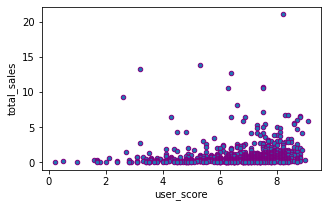

In [42]:
ps3_users = data_ps3[(data_ps3['platform'] == 'PS3') & (data_ps3['user_score'])]
ps3_users.plot(kind='scatter', x='user_score', y='total_sales', ec='purple', figsize=(5,3))

Оценка пользователей не влияет на продажи

In [43]:
data_ps3_cor = data_ps3[['total_sales', 'critic_score', 'user_score']]
data_ps3_cor.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.432759,0.128416
critic_score,0.432759,1.000000,0.631154
user_score,0.128416,0.631154,1.000000


По таблице с корреляцией, так же видно что связи с оценкой пользователей и продажами нет, а связь с оценкой критиков и продажами есть необольшая.

__X360__

- Влияние оценки критиков на продажи

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

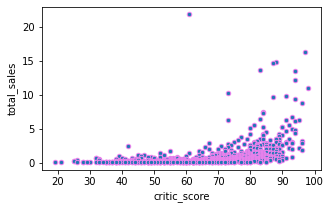

In [44]:
data_x360 = data[data['platform'] == 'X360']
x360_critic = data_x360[(data_x360['platform'] == 'X360') & (data_x360['critic_score'] > 0)]
x360_critic.plot(kind='scatter', x='critic_score', y='total_sales', ec='violet', figsize=(5,3))

По диаграмме рассеивания можно сделать вывод, что чем выше оценка критиков, тем выше становятся продажи.

- Влияние оценки пользователей на продажи

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

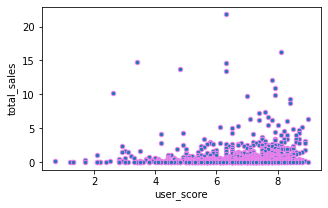

In [45]:
x360_users = data_x360[(data_x360['platform'] == 'X360') & (data_x360['user_score'])]
x360_users.plot(kind='scatter', x='user_score', y='total_sales', ec='violet', figsize=(5,3))

Оценка пользователей не влияет на продажи

In [46]:
data_x360_cor = data_x360[['total_sales', 'critic_score', 'user_score']]
data_x360_cor.corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.392866,0.114187
critic_score,0.392866,1.000000,0.625020
user_score,0.114187,0.625020,1.000000


По таблице с корреляцией, так же видно что связи с оценкой пользователей и продажами нет, а связь с оценкой критиков и продажами есть необольшая.

__Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?__

In [47]:
promising_platforms.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          376.25
Shooter         282.11
Sports          167.81
Role-Playing    151.26
Misc             48.78
Racing           42.18
Fighting         35.53
Platform         34.13
Simulation       25.16
Adventure        22.68
Strategy          4.79
Puzzle            2.72
Name: total_sales, dtype: float64

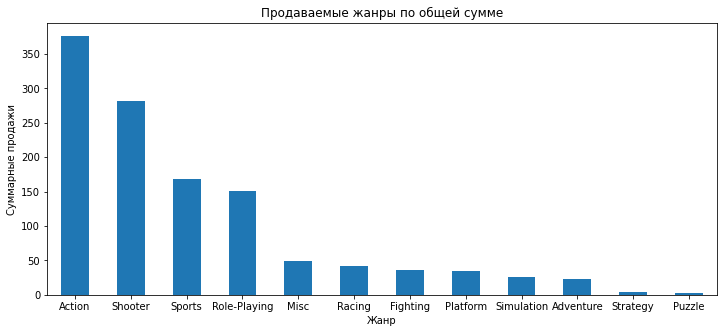

In [48]:
genre_sum = promising_platforms.groupby('genre')['total_sales'].sum().reset_index()
genre_sales = genre_sum.sort_values(by='total_sales', ascending=False).plot(x='genre', y='total_sales', kind='bar', figsize=(12, 5), rot=360)
genre_sales.get_legend().remove()
plt.title('Продаваемые жанры по общей сумме', size=12)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()

Предпочтение покупатели отдают играм жанра Action и Shooter, далее по популярности Sports и Role-Playing. Самые низкие продажи по жанрам Strategy и Puzzle. Можно сделать вывод, что пользователи отдают предпочтения более динамичным играм, играм стрелялкам, нежели спокойным играм.


<br>Выше построила график, для таблицы о суммарных продажах по каждому жанру. 
Далее необходимо построить график по медианному значениею суммарных продажах, так как это будет более правильно для корректных выводов. Это имеет смысл, так как та или иная игра в каждом жанре может значительно выбиваться, например в одном жанре, разные игры могли продаться за очень высокие деньги, а какие-то за копейки (грубо, но общий смысл ясен)).
</div>

In [49]:
promising_platforms.groupby('genre')['total_sales'].median().sort_values(ascending=False)

genre
Shooter         0.585
Sports          0.390
Racing          0.225
Platform        0.210
Role-Playing    0.200
Fighting        0.180
Action          0.170
Misc            0.150
Simulation      0.130
Strategy        0.085
Puzzle          0.070
Adventure       0.060
Name: total_sales, dtype: float64

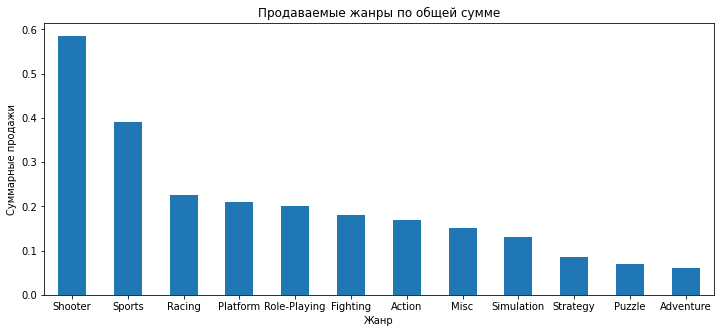

In [50]:
genre_med = promising_platforms.groupby('genre')['total_sales'].median().reset_index()
genre_sales_med = genre_med.sort_values(by='total_sales', ascending=False).plot(x='genre', y='total_sales', kind='bar', figsize=(12, 5), rot=360)
genre_sales_med.get_legend().remove()
plt.title('Продаваемые жанры по общей сумме', size=12)
plt.xlabel('Жанр')
plt.ylabel('Суммарные продажи')
plt.show()


<br>Реальная картина такова, что покупатели отдают предпочтения играм жанра Shooter и Sports, далее по популярности Racing, Platform и Role-Playing. Самые низкие продажи по жанрам Puzzle и Adventure. Можно сделать вывод, что пользователи отдают предпочтения более динамичным играм, играм стрелялкам, нежели спокойным играм.
</div>

# Шаг 4. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

-	Самые популярные платформы (топ-5). Опишите различия в долях продаж.


ТОП-5 платформ для NA (Северная Америка)

<AxesSubplot:ylabel='platform'>

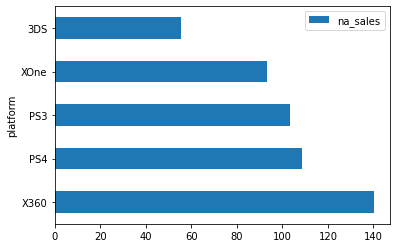

In [51]:
top5_platform_na = (current_period
                     .pivot_table(index='platform', values='na_sales', aggfunc='sum')
                     .sort_values(by='na_sales', ascending=False)
                     .head(5))

top5_platform_na.plot(kind='barh')

ТОП-5 платформ для EU (Европа)

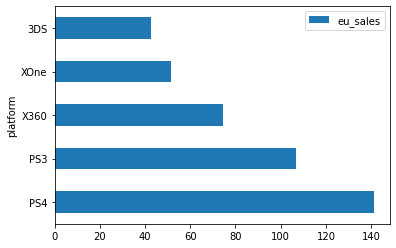

In [52]:
top5_platform_eu = (current_period
                     .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
                     .sort_values(by='eu_sales', ascending=False)
                     .head(5))

top5_platform_eu.plot(kind='barh');

ТОП-5 платформ для JP (Япония)

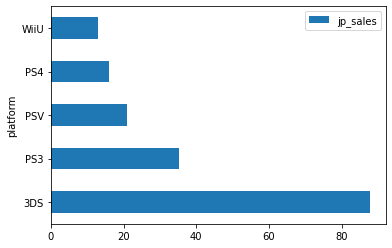

In [53]:
top5_platform_jp = (current_period
                     .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
                     .sort_values(by='jp_sales', ascending=False)
                     .head(5))

top5_platform_jp.plot(kind='barh');

ТОП-5 платформ для регионов. Самая популярная платформа для Северной Америки - X360, для Европы - PS4 и PS3, для Японии - 3DS.

- Самые популярные жанры (топ-5)

ТОП-5 жанров для NA (Северная Америка)

<AxesSubplot:ylabel='genre'>

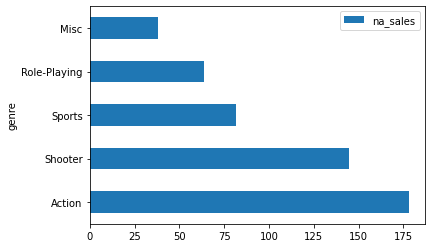

In [54]:
top5_genre_na = (current_period
                     .pivot_table(index='genre', values='na_sales', aggfunc='sum')
                     .sort_values(by='na_sales', ascending=False)
                     .head(5))

top5_genre_na.plot(kind='barh')

ТОП-5 жанров для EU (Европа)

<AxesSubplot:ylabel='genre'>

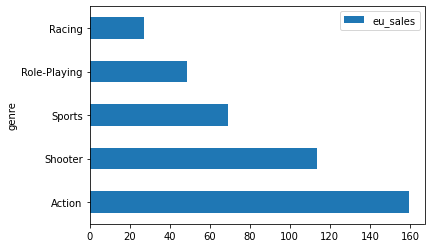

In [55]:
top5_genre_eu = (current_period
                     .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
                     .sort_values(by='eu_sales', ascending=False)
                     .head(5))

top5_genre_eu.plot(kind='barh')

ТОП-5 жанров для JP (Япония)

<AxesSubplot:ylabel='genre'>

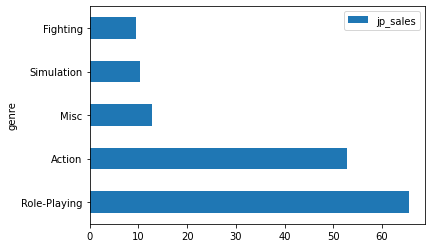

In [56]:
top5_genre_jp = (current_period
                     .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
                     .sort_values(by='jp_sales', ascending=False)
                     .head(5))

top5_genre_jp.plot(kind='barh')

Самые популярные жанры для Северной Америки и Европы - Action, а для Японии - Role-Playing

-	Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Рейтинг для NA (Северная Америка)

<AxesSubplot:ylabel='rating'>

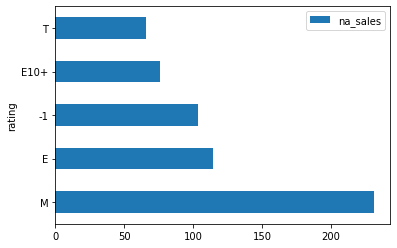

In [57]:
rating_na = (current_period
                     .pivot_table(index='rating', values='na_sales', aggfunc='sum')
                     .sort_values(by='na_sales', ascending=False))

rating_na.plot(kind='barh')

Рейтинг для EU (Европа)

<AxesSubplot:ylabel='rating'>

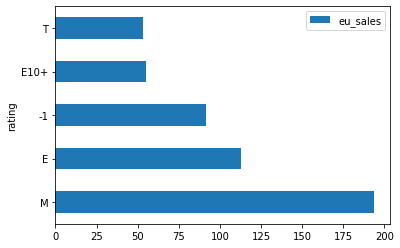

In [58]:
rating_eu = (current_period
                     .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
                     .sort_values(by='eu_sales', ascending=False))

rating_eu.plot(kind='barh')

Рейтинг для JP (Япония)

<AxesSubplot:ylabel='rating'>

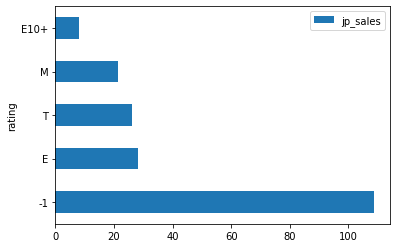

In [59]:
rating_jp = (current_period
                     .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
                     .sort_values(by='jp_sales', ascending=False))

rating_jp.plot(kind='barh')

Популярные рейтинги в Северной Америке и Европе M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков.

А в Японии предпочтителен рейтинг E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Но самые популярные игры без указания возростного рейтинга.

# Шаг 5. Проверьте гипотезы

-	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

__- Гипотеза 1:__

H_0: средний пользовательский рейтинг (user_score) Xbox One  = средний пользовательский рейтинг (user_score) PC

H_1: средний пользовательский рейтинг (user_score) Xbox One ≠ средний пользовательский рейтинг (user_score) PC

alpha = 0.05 - критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу

In [60]:
Xbox_One = current_period.query('platform == "XOne"')['user_score'].dropna()
PC = current_period.query('platform == "PC"')['user_score'].dropna()

In [61]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(Xbox_One, PC, equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


In [62]:
print('Средний пользовательский рейтинг Xbox_One = ', Xbox_One.mean())
print('Средний пользовательский рейтинг PC = ',PC.mean())

Средний пользовательский рейтинг Xbox_One =  6.521428571428572
Средний пользовательский рейтинг PC =  6.4286407766990274


-	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

__- Гипотеза 2:__

H_0: средний пользовательский рейтинг (user_score) жанра Action = средний пользовательский рейтинг (user_score) жанра Sports

H_1: средний пользовательский рейтинг (user_score) жанра Action ≠ средний пользовательский рейтинг (user_score) жанра Sports


alpha = 0.05 - критический уровень статистической значимости если p-value окажется меньше него - отвергнем гипотезу

In [63]:
Action = current_period.query('genre == "Action"')['user_score'].dropna()
Sports = current_period.query('genre == "Sports"')['user_score'].dropna()

In [64]:
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(Action, Sports, equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

4.24307776572644e-20
Отвергаем нулевую гипотезу


In [65]:
print('Средний пользовательский рейтинг жанра Action = ', Action.mean())
print('Средний пользовательский рейтинг жанра Sports = ',Sports.mean())

Средний пользовательский рейтинг жанра Action =  6.825047801147227
Средний пользовательский рейтинг жанра Sports =  5.455897435897437


Проверили двухстороннюю гипотезу. Сформировали нулевую гипотезу, исходя из задания, и сформировали альтернативную гипотезу (протевоположную нулевой).

Выводы: с 99% можно утверждать, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковы. 

Средние пользовательские рейтинги жанров Action и Sports разные.

# Шаг 6. Напишите общий вывод

В этом проекте были проанализированы исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Мы подготовили данные к анализу, заменили названия столбцов, преобразовали данные в нужные типы и обработали пропуски там, где это было необходимо и возможно. Так же добавили новый столбец с данными о суммарных продажах по регионам.
Проанализировали сколько игр выпускалось в разные годы. Сделали вывод что данные за все периоды не важны, так как до 1995 года выпускалось очень мало игр (менее 200). Пик количества выпускаемых игр по годам пришелся на 2008-2009, далее идет спад. Скорее всего это связано с тем, что после 2011 начали развивать индустрию игр на мобильные телефоны, ведь все больше пользователей стали предпочитать играть на мобильных устройствах.

Посмотрели, как менялись продажи по платформам. Опередили, что средний срок жизни платформ около 10лет. Так же стоит отметить, что на начало 90-х конкуренции как таковой и не было, платформа PS была единственной с высокими продажами, и так вплоть до 2004 было мало хороших платформ, но с развитием индустрии, и развитием технологий, а так же появлению все новых идей, количество платформ начинает увеличиваться, и не просто на 1 штуку, а появляется очень много конкурентов. PS хорошо справляется с конкуренцией, развивает свою платформу, и выпускает не менее успешные PS2 и PS3. На популярность каждой платформы влияли фанаты игр, которые выходили эксклюзивно на определенных платформах, например: для PS3 Uncharted 3: Иллюзии Дрейка вышла в 2011 году, имеет высокий рейтинг. А так же сильно влияло доп.оборудование выпускаемое к каждой платформе эксклюзивно, например для PS3 это PS Move. Соответственно на жизнь каждой платформы влияет несколько факторов, это фанаты игр, развитие технологий и эксклюзивное доп.оборудование, это все приносит больше прибыли и заинтересованности к той или иной платформе.
Определили актуальный период – это с 2012 по 2016, для построения прогноза на 2017г.
За выбранный период, можно сделать вывод, что лидируют по суммарным продажам PS4- но согласно графику, продажи с 2015г стали падать. Несколько потенциально прибыльных платформ: PS3, X360, PS4, 3DS и XOne. Все они в топе, по суммарным продажам, за актуальный период, но две из них растут в продажах, а 3 падают.
Определили, наиболее перспективные платформы - PS4, PS3, X360 далее со средними показателями - XOne, WiiU.
Так же сделали вывод о продажах основываясь на  отзывы критиков и игроков: чем выше оценка критиков, тем выше становятся продажи. Это логично, многие пользователи доверяют отзывам экспертов, и на этом могут основываться их покупки. А на продажи оценки игроков не влияют.
Определили самые популярные жанры - Предпочтение покупатели отдают играм жанра Shooter и Sports, далее по популярности Racing,  Platform и Role-Playing. Можно сделать вывод, что пользователи отдают предпочтения более динамичным играм, играм стрелялкам, нежели спокойным играм.
 Составили портрет пользователей по регионам, и по ним можно сделать вывод, что пользователи Северной Америки и Европы, схожи в предпочтениях по выбору жанра - Action и возрастного рейтинга - M - Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков., но играют на разных платформах, так игроки из Северной Америки отдают предпочтение – X360, а пользователи Европы - PS4. В то время как игроки Японии в корне отличаются, они предпочитают играть на платформе - 3DS, жанр - Role-Playing, возрастной рейтинг - E - Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Но самые популярные игры без указания возростного рейтинга.
Так же проверили две двухсторонние гипотезы. Сформировали нулевую гипотезу, исходя из задания, и сформировали альтернативную гипотезу (противоположную нулевой). И сделали выводы, что с 99% можно утверждать, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковы. Средние пользовательские рейтинги жанров Action и Sports разные.

Для интернет-магазина «Стримчик», можно рекомендовать, делать ставки на игры для платформ PS3, X360, PS4, 3DS, XOne. Продавать игры в жанре Shooter, Sports, Racing, Platform, Role-Playing, Action – самые популярные, согласно проведенному анализу. Это все удовлетворит предпочтения пользователей во всех регионах. Так же стоит обратить внимание на оценки критиков, и не основываться в принятии решении на оценки пользователей.
